# Seminar 4.

Classes, imports (+ random & math), try statement

Let's create example class - Item for online store website.

- `self` is current instance. we can use it to access instance attributes and methods
- every regular method automatically gets current instance as a first argument
- `__init__` runs automatically and this is a place to declare instance attributes.

In [2]:
class Item:
    def __init__(self, name, price, currency='$'):
        self.name = name
        self.price = price
        self.currency = currency

    def display(self):
        print(f'I\'m an item "{self.name}" for {self.currency} {self.price}')


ball = Item('Ball', 10)
ball2 = Item('Ball', 5, '₽')
ball.display()  # Item.display(ball)
ball2.display()  # Item.display(ball2)

I'm an item "Ball" for $ 10
I'm an item "Ball" for ₽ 5


In [3]:
class Item:
    def __init__(self, name, price, currency='$'):
        self.name = name
        self.price = price
        self.currency = currency

    @staticmethod
    def greet():
        print("Hello Everyone!")

    def display(self):
        print(f'I\'m an item "{self.name}" for {self.currency} {self.price}')


ball = Item('Ball', 10)
ball.greet()  # Item.greet(ball)
Item.greet()

Hello Everyone!
Hello Everyone!


In [4]:
def my_custom_staticmethod(func):
    def inner(*args):
        return func()
    return inner

class Item:
    def __init__(self, name, price, currency='$'):
        self.name = name
        self.price = price
        self.currency = currency

    @my_custom_staticmethod
    def greet():
        print("Hello Everyone!")

    def display(self):
        print(f'I\'m an item "{self.name}" for {self.currency} {self.price}')


ball = Item('Ball', 10)
ball.greet()  # Item.greet(ball)

Hello Everyone!


There are several magic/dunder/special methods. They are used to override behaviour of built-in functionality.

In [5]:
class Item:

    def __init__(self, name, price, currency='$'):
        self.name = name
        self.price = price
        self.currency = currency

    def __repr__(self):
        return f'I\'m an item "{self.name}" for {self.currency} {self.price}'


ball = Item('Ball', 10)
ball
print(str(ball))
print(ball)

I'm an item "Ball" for $ 10
I'm an item "Ball" for $ 10


In [6]:
class Item:

    def __init__(self, name, price, currency='$'):
        self.name = name
        self.price = price
        self.currency = currency

    def __repr__(self):
        """
        It's for engineers
        """
        return f'Item("{self.name}", {self.price})'

    def __str__(self):
        """
        It's for a user (someone who uses this class)
        """
        return f'(in __str__) I\'m an item "{self.name}" for {self.currency} {self.price}'


ball = Item('Ball', 10)
print(str(ball))
print(ball)

(in __str__) I'm an item "Ball" for $ 10
(in __str__) I'm an item "Ball" for $ 10


In [7]:
class Item:

    def __init__(self, name, price, currency='$'):
        self.name = name
        self.price = price
        self.currency = currency

    def __repr__(self):
        """
        It's for engineers
        """
        return f'Item("{self.name}", {self.price})'

    def __str__(self):
        """
        It's for a user (someone who uses this class)
        """
        return f'(in __str__) I\'m an item "{self.name}" for {self.currency} {self.price}'

    def __lt__(self, other):
        """
        "<" operator overloading.
        """
        return self.price < other.price

    def __bool__(self):
        """
        Truth value testing overloading.
        """
        return bool(self.price)


ball = Item('Ball', 10)
ball2 = Item('Ball', 5, '₽')
print(ball)
print(ball2)

print(ball < ball2)

list_example = [1]
if list_example:  # len(list_example)
    print('list_example is not empty')

if Item('Ball', 0):  # if bool(ball)
    print('ball is True')
else:
    print('ball is False')

(in __str__) I'm an item "Ball" for $ 10
(in __str__) I'm an item "Ball" for ₽ 5
False
list_example is not empty
ball is False


In [8]:
class Item:

    def __init__(self, name, price, currency='$'):
        self.name = name
        self.price = price
        self.currency = currency

    def __gt__(self, other):
        """
        ">" operator overloading.
        """
        if isinstance(other, int):
            return self.price > other
        return self.price > other.price

    def __lt__(self, other):
        """
        "<" operator overloading.
        """
        if isinstance(other, int):
            return self.price < other
        return self.price < other.price

    def __repr__(self):
        """
        It's for engineers
        """
        return f'Item("{self.name}", {self.price})'


ball = Item('Ball', 10)
ball2 = Item('Ball', 5, '₽')

balls = [ball, ball2, 123]
# 1 < Item <-> !((Item > 1) and (Item != 1))
sorted(balls)

[Item("Ball", 5), Item("Ball", 10), 123]

Let's use imports to get modules from The Python Standard Library.
- The Python Standard Library includes a lot of useful packages
- two of them - `math `to do math and `random` to generate random numbers
- you can use `import module` or `from module import attribute` syntax
- you can also use `from module import *` but don't

In [24]:
import math
from random import randint

Let's create `ItemCountLevel` with different *class* attributes - these attributes will be used as elements of a set

In [25]:
class ItemCountLevel:
    EMPTY = 'empty'
    LOW = 'low'
    MIDDLE = 'middle'
    HIGH = 'high'


In [26]:
class Item:

    def __init__(self, name, price, currency='$'):
        self.name = name
        self.price = price
        self.currency = currency

    def __repr__(self):
        return f'I\'m an item "{self.name}" for {self.currency} {self.price}'

    def get_count(self):
        return randint(0, 1500)

    def get_count_level(self):
        """
        count = 0  - EMPTY
        log(count) < 5  - LOW
        log(count) < 10  - MIDDLE
        log(count) - HIGH
        """
        count = self.get_count()
        if count == 0:
            return ItemCountLevel.EMPTY
        elif math.log(count) < 5:
            return ItemCountLevel.LOW
        elif math.log(count) < 10:
            return ItemCountLevel.MIDDLE
        else:
            return ItemCountLevel.HIGH



ball = Item('Ball', 5)
for _ in range(10):
    print(ball.get_count_level())

middle
middle
middle
middle
middle
middle
middle
middle
middle
middle


Another (and better looking) way to do this is by creating `enum` object:

In [27]:
from enum import Enum


class ItemCountLevelEnum(Enum):
    EMPTY = 'empty'
    LOW = 'low'
    MIDDLE = 'middle'
    HIGH = 'high'


In [28]:
class Item:

    def __init__(self, name, price, currency='$'):
        self.name = name
        self.price = price
        self.currency = currency

    def __repr__(self):
        return f'I\'m an item "{self.name}" for {self.currency} {self.price}'

    def get_count(self):
        return randint(0, 1500)

    def get_count_level(self):
        """
        count = 0  - EMPTY
        log(count) < 5  - LOW
        log(count) < 10  - MIDDLE
        log(count) - HIGH
        """
        count = self.get_count()
        if count == 0:
            return ItemCountLevelEnum.EMPTY.value
        elif math.log(count) < 5:
            return ItemCountLevelEnum.LOW.value
        elif math.log(count) < 10:
            return ItemCountLevelEnum.MIDDLE.value
        else:
            return ItemCountLevelEnum.HIGH.value



ball = Item('Ball', 5)
for _ in range(10):
    print(ball.get_count_level())

middle
middle
middle
middle
middle
middle
middle
low
low
middle


Pay attention that class attributes and instance attributes are not the same.

In [29]:
import math
from random import randint


class ItemCountLevel:
    EMPTY = 'empty'
    LOW = 'low'
    MIDDLE = 'middle'
    HIGH = 'high'


class Item:
    currency = '$'

    def __init__(self, name, price):
        self.name = name
        self.price = price

    def __repr__(self):
        return f'I\'m an item "{self.name}" for {self.currency} {self.price}'

    def get_count(self):
        return randint(0, 1500)

    def get_count_level(self):
        """
        count = 0  - EMPTY
        log(count) < 5  - LOW
        log(count) < 10  - MIDDLE
        log(count) - HIGH
        """
        count = self.get_count()
        if count == 0:
            return ItemCountLevel.EMPTY
        elif math.log(count) < 5:
            return ItemCountLevel.LOW
        elif math.log(count) < 10:
            return ItemCountLevel.MIDDLE
        else:
            return ItemCountLevel.HIGH



ball1 = Item('Ball 1', 5)
ball2 = Item('Ball 2', 10)
Item.currency = '&'

print(ball1)
print(ball2)

I'm an item "Ball 1" for & 5
I'm an item "Ball 2" for & 10


If atributes name starts with `_` it means it is private (but interpreter doesn't know anything about it, so you can directly access it)

In [31]:
class Item:
    def __init__(self, name, price, currency='$'):
        self._name = name
        self._price = price
        self._currency = currency
    def __repr__(self):
        return f'I\'m an item "{self._name}" for {self._currency} {self._price}'

ball1 = Item('Ball 1', 5)
print(ball1)
print(ball1._name)

I'm an item "Ball 1" for $ 5
Ball 1


You can try to make it "more" private by adding 2 underscores: now you can't directly access attributes:

In [32]:
class Item:
    def __init__(self, name, price, currency='$'):
        self.__name = name
        self.__price = price
        self.__currency = currency
    def __repr__(self):
        return f'I\'m an item "{self.__name}" for {self.__currency} {self.__price}'

ball1 = Item('Ball 1', 5)
print(ball1)
print(ball1.__name)

I'm an item "Ball 1" for $ 5


AttributeError: ignored

But you actually still access them, interpreter just renamed them

In [33]:
print(ball1._Item__name)

Ball 1


For attributes that are not supposed to be read/modified directly you can define *getter* and *setter* methods:

In [34]:
class Item:
    def __init__(self, name, price, currency='$'):
        self._name = name
        self._price = price
        self._currency = currency

    @property
    def name(self):
        print("ACCESSING _name")
        return self._name.upper()

    def __repr__(self):
        return f'I\'m an item "{self._name}" for {self._currency} {self._price}'

ball1 = Item('Ball 1', 5)
print(ball1)
# ball1._name = "asdasd" # NONONO

I'm an item "Ball 1" for $ 5


In [35]:
ball1.name

ACCESSING _name


'BALL 1'

In [36]:
class Item:
    def __init__(self, name, price, currency='$'):
        self._name = name
        self._price = price
        self._currency = currency

    @property
    def name(self):
        print("ACCESSING _name")
        return self._name.upper()

    @name.setter
    def name(self, value):
        self._name = value

    @property
    def price(self):
        return self._price

    @price.setter
    def price(self, value):
        if value <= 0:
            print("CANNOT SET NEGATIVE VALUE")
        else:
            self._price = value

    def __repr__(self):
        return f'I\'m an item "{self._name}" for {self._currency} {self._price}'

ball1 = Item('Ball 1', 5)
print(ball1)
# ball1._name = "asdasd" # NONONO

I'm an item "Ball 1" for $ 5


In [37]:
ball1.price = 123
print(ball1.price)
ball1.price = 0
print(ball1.price)

123
CANNOT SET NEGATIVE VALUE
123


## Exceptions

Now, let's talk about exceptions and how you can catch them:

In [38]:
a = [1, 2, 3, 4]

try:

    x = a[4]

except:  # very bad! never do this way
    print("EXCEPTION")

EXCEPTION


In [39]:
try:
    x = a[4]
except IndexError:  # you should always specify which error you're trying to catch
    print("IndexError happened")

IndexError happened


In [40]:
list_of_err = []
for idx in range(10):
    try:
        x = a[idx]
    except IndexError as err:
        # print("IndexError happened")
        list_of_err.append(err)
list_of_err

[IndexError('list index out of range'),
 IndexError('list index out of range'),
 IndexError('list index out of range'),
 IndexError('list index out of range'),
 IndexError('list index out of range'),
 IndexError('list index out of range')]

In [41]:
idx = 6
di = {1:2}

try:
    di[312]
    x = a[idx]
    x / 0
except ZeroDivisionError:
    print("DIVISION BY ZERO")
except IndexError:
    print("OUT OF BOUNDS")
finally:
    print("THIS WILL ALWAYS BE PRINTED")

THIS WILL ALWAYS BE PRINTED


KeyError: ignored

In [42]:
idx = 6
di = {1:2}

try:
    di[312]
    x = a[idx]
    x / 0
except ZeroDivisionError:
    print("DIVISION BY ZERO")
except IndexError:
    print("OUT OF BOUNDS")
finally:
    print("THIS WILL ALWAYS BE PRINTED")
    1 / 0

THIS WILL ALWAYS BE PRINTED


ZeroDivisionError: ignored

In [43]:
idx = 6
di = {1:2}
err_flag = True

try:
    if err_flag:
        x = a[idx]
        x / 0
    else:
        print("There is no error")
except ZeroDivisionError:
    print("DIVISION BY ZERO")
except IndexError:
    print("OUT OF BOUNDS")
else:
    print("This happens only if there were no errors")
finally:
    print("THIS WILL ALWAYS BE PRINTED")

OUT OF BOUNDS
THIS WILL ALWAYS BE PRINTED


In [44]:
idx = 6
di = {1:2}
err_flag = False

try:
    if err_flag:
        x = a[idx]
        x / 0
    else:
        print("There is no error")
except ZeroDivisionError:
    print("DIVISION BY ZERO")
except IndexError:
    print("OUT OF BOUNDS")
else:
    print("This happens only if there were no errors")
finally:
    print("THIS WILL ALWAYS BE PRINTED")

There is no error
This happens only if there were no errors
THIS WILL ALWAYS BE PRINTED


## Iterables





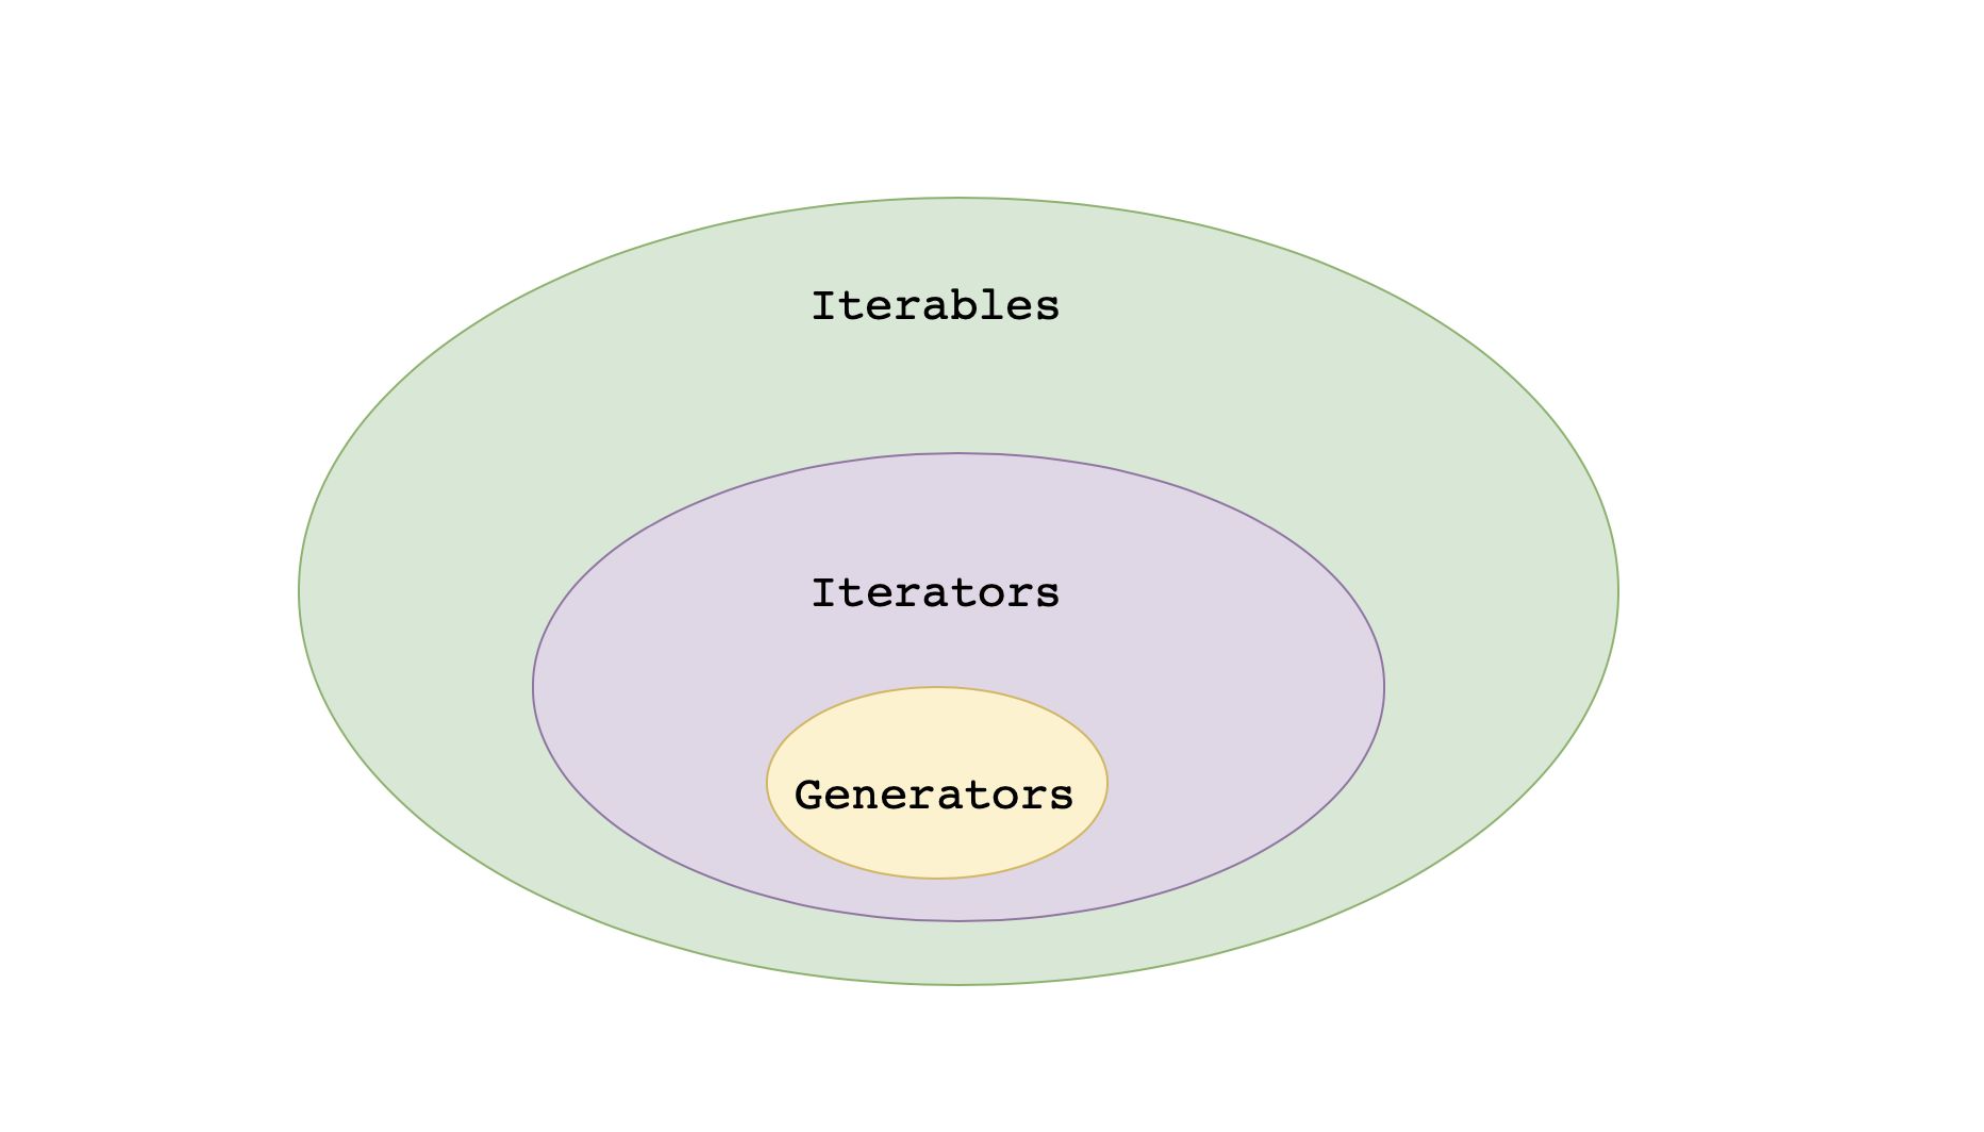

Basically, *Iterable* object is any object you can iterate over (i.e. run `for _ in iterable`)

In [45]:
iterable_obj = [1,2,3]  # this is iterable
iterable_obj = (1,2,3)  # this is iterable

for elem in iterable_obj:
    pass


## Iterator


Iterator is an object with `__iter__` and `__next__` methods:

In [46]:
class MyCustomIterator:
    def __init__(self, num_iterations):
        self.num_iterations = num_iterations
        self.idx = 0

    def __iter__(self):
        print("ITER HAS BEEN CALLED")
        return self

    def __next__(self):
        self.idx += 1
        if self.idx > self.num_iterations:
            raise StopIteration
        return self.idx

In [52]:
obj = MyCustomIterator(5)
iter(obj)
next(obj)

ITER HAS BEEN CALLED


1

In [53]:
for i in obj:
    print(i)

ITER HAS BEEN CALLED
2
3
4
5


## Iterator without __next__

In [54]:
class IteratorGetItem:
    def __init__(self, li: list):
        self._list = li

    def __getitem__(self, item):
        print("getitem called")
        return self._list[item]

In [55]:
iterator = IteratorGetItem([1,2,3,4,5])

In [57]:
for item in iterator:
    print(item)

getitem called
1
getitem called
2
getitem called
3
getitem called
4
getitem called
5
getitem called


## A bit more about generators (yield from)

In [58]:
def gen(i):
    start = 0
    while start < i:
        yield start
        start += 1


generator = gen(3)
[x for x in generator]

[0, 1, 2]

In [59]:
def chain(*iterables):
    for iterable in iterables:
        for elem in iterable:
            yield elem

# chain([1,2,3], [4,5,6], [7,8,9])
# [1, 2, 3, 4, 5, 6, 7, 8, 9]

In [60]:
list(chain([1,2,3], [4,5,6], [7,8,9]))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [61]:
list(chain([1,2,3], [4,5,6], range(3), (-1,-2)))

[1, 2, 3, 4, 5, 6, 0, 1, 2, -1, -2]

In [62]:
def chain(*iterables):
    for iterable in iterables:
        yield from iterable

list(chain([1,2,3], [4,5,6], range(3), (-1,-2)))

[1, 2, 3, 4, 5, 6, 0, 1, 2, -1, -2]

In [63]:
from itertools import chain

In [64]:
list(chain([1,2,3, [1,2,3,[1,2]]], [4,5,6], range(3), (-1,-2)))

[1, 2, 3, [1, 2, 3, [1, 2]], 4, 5, 6, 0, 1, 2, -1, -2]

In [65]:
from itertools import cycle

In [67]:
cyc = cycle([1,2])
print(next(cyc))
print(next(cyc))
print(next(cyc))
print(next(cyc))
print(next(cyc))

1
2
1
2
1


## Context managers

In [68]:
f = open("file.txt")
f.read()

'file.txt\n'

In [150]:
f.close()

In [151]:
files = []
for _ in range(10000000):
    files.append(open("file.txt", "w"))

OSError: ignored

In [69]:
f = open("file.txt")
f.read()
f.close()

In [70]:
f = open("file.txt")
f.read()
raise Exception("EXCEPTION")
f.close()

Exception: ignored

In [71]:
try:
    f = open("file.txt")
    f.read()
    raise Exception("EXCEPTION")
finally:
    print("FILES IS CLOSED ANYWAY")
    f.close()

FILES IS CLOSED ANYWAY


Exception: ignored

In [72]:
# context manager
with open("file.txt") as f:
    print(f.read())

file.txt



In [73]:
class ContextManagerForTextFile:
    def __init__(self, filename):
        self.filename = filename
        self.file = None

    def __enter__(self):
        print("ENTER IS CALLED")
        self.file = open(self.filename)
        return self.file

    def __exit__(self, *args):
        print("EXIT IS CALLED")
        self.file.close()

    # def __aenter__
    # def __aexit__

In [74]:
with ContextManagerForTextFile("file.txt") as f:
    print(f.read())

ENTER IS CALLED
file.txt

EXIT IS CALLED


In [75]:
with ContextManagerForTextFile("file.txt") as f:
    print(f.read())
    raise Exception("EXCEPTION")

ENTER IS CALLED
file.txt

EXIT IS CALLED


Exception: ignored

In [76]:
from contextlib import contextmanager

In [77]:
@contextmanager
def open_file(filename):
    f = open(filename)  # acquire resources
    try:
        print("FILE IS OPENED")
        yield f
    finally:
        print("FILE IS CLOSED")
        f.close()  # free resources

In [78]:
with open_file("file.txt") as f:
    print(f.read())
    raise Exception("EXCEPTION")

FILE IS OPENED
file.txt

FILE IS CLOSED


Exception: ignored

In [79]:
with open_file("file.txt") as f:
    print(f.read())

FILE IS OPENED
file.txt

FILE IS CLOSED
